# Robust analysis

Here, we analyze the robustness of the CSP method, plot the landscape of the loss function based on the CSP model for the specified gene and quantify that by the goodness of fit we can select genes with more robust parameters for downstream analysis.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import dynamo as dyn
import numpy as np
import CSP4ML
import scanpy as sc
import matplotlib.pyplot as plt
sc.set_figure_params(scanpy=True, fontsize=6, transparent=True)

## Load the data

The analysis is based on the cell cycle dataset. To run analysis on your own data, read your fileto an AnnData object with adata = dyn.read('file name').

In [2]:
filename = './data/rpe1.h5ad'
rpe1 = dyn.read(filename)

dyn.convert2float(rpe1, ['Cell_cycle_possition', 'Cell_cycle_relativePos'])

rpe1_kinetics = rpe1[rpe1.obs.exp_type == 'Pulse', :]
rpe1_kinetics.obs['time'] = rpe1_kinetics.obs['time'].astype(str)
rpe1_kinetics.obs.loc[rpe1_kinetics.obs['time'] == 'dmso', 'time'] = -1
rpe1_kinetics.obs['time'] = rpe1_kinetics.obs['time'].astype(float)
rpe1_kinetics = rpe1_kinetics[rpe1_kinetics.obs.time != -1, :]

rpe1_kinetics.obs.time = rpe1_kinetics.obs.time.astype('float')
rpe1_kinetics.obs.time = rpe1_kinetics.obs.time / 60  # convert minutes to hours

rpe1_kinetics_without_spliced = rpe1_kinetics.copy()

rpe1_kinetics_without_spliced.layers['new'], rpe1_kinetics_without_spliced.layers['total'] = rpe1_kinetics_without_spliced.layers['ul'] + rpe1_kinetics_without_spliced.layers['sl'], \
                                                             rpe1_kinetics_without_spliced.layers['su'] + rpe1_kinetics_without_spliced.layers['sl'] + \
                                                             rpe1_kinetics_without_spliced.layers['uu'] + rpe1_kinetics_without_spliced.layers['ul']

del rpe1_kinetics_without_spliced.layers['uu'], rpe1_kinetics_without_spliced.layers['ul'], rpe1_kinetics_without_spliced.layers['su'], rpe1_kinetics_without_spliced.layers['sl']

del rpe1,rpe1_kinetics

## Use the CSP method to infer parameter $\gamma_t$ and calculate goodness of fit $\bar{R}^{2}_{D}$

Use the CSP method to calculate the parameter $\gamma_t$ to determine the scope of the loss function landscape that needs to be traversed:

In [3]:
dyn.tl.recipe_kin_data(adata=rpe1_kinetics_without_spliced,
                       keep_filtered_genes=True,
                       keep_raw_layers=True,
                       del_2nd_moments=True,
                       tkey='time',
                       n_top_genes=1000,
                       est_method='CSP4ML_CSP',
                       )

|-----> keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: keep_filtered_cells_key=False
|-----> apply Monocole recipe to adata...
|-----> convert ensemble name to official gene name
|-----? Your adata object uses non-official gene names as gene index. 
Dynamo is converting those names to official gene names.
|-----> Storing myGene name info into local cache db: mygene_cache.sqlite.
[ Future queries will be cached in "/home/pqw/pythonProject3/mygene_cache.sqlite" ]
querying 1-1000...done. [ from cache ]
querying 1001-2000...done. [ from cache ]
querying 2001-3000...done. [ from cache ]
querying 3001-4000...done. [ from cache ]
querying 4001-5000...done. [ from cache ]
querying 5001-6000...done. [ from cache ]
querying 6001-7000...done. [ from cache ]
querying 7001-8000...done. [ from cache ]
querying 8001-9000...done. [ from cache ]
querying 9001-10000...done. [ from cache ]
querying 10001-11000...done. [ from cache ]
querying 11001-11848...done. [ from cache 

Estimate gamma via linear regression of t vs. -ln(1-K): 1000it [00:01, 623.90it/s]
Infer parameters via maximum likelihood estimation based on the CSP model: 86it [00:00, 420.45it/s]

Inequality constraints incompatible


Infer parameters via maximum likelihood estimation based on the CSP model: 685it [00:01, 501.85it/s]

Inequality constraints incompatible


Infer parameters via maximum likelihood estimation based on the CSP model: 803it [00:01, 545.43it/s]

Inequality constraints incompatible


Infer parameters via maximum likelihood estimation based on the CSP model: 1000it [00:01, 507.69it/s]


|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [12.1915s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> 0 genes are removed because of nan velocity values.
|

AnnData object with n_obs × n_vars = 2793 × 11402
    obs: 'Plate_Id', 'Condition_Id', 'Well_Id', 'RFP_log10_corrected', 'GFP_log10_corrected', 'Cell_cycle_possition', 'Cell_cycle_relativePos', 'exp_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'Gene_Id', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'use_for_pca', 'frac', 'ntr', 'alpha', 'a', 'b', 'alpha_a', 'alpha_i', 'beta', 'p_half_life', 'gamma', 'half_life', 'cost', 'logLL', 'gamma_k', 'gamma_r2', 'gamma_r2_raw', 'prob_off', 'use_for_dynamics', 'use_for_transition'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'dynamics', 'neighbors', 'umap_fit', 'grid_velocity_umap'
    obsm: 'X_pca', 

## Plot the landscape of the loss function based on the CSP model for the specified gene

Change the matplotlib settings for better visualization:

In [4]:
figsize = (2.6,2.2)
dpi = 150

Plot the landscape for the specified gene:

Visualize the landscape of the CSP model loss function: 0it [00:00, ?it/s]

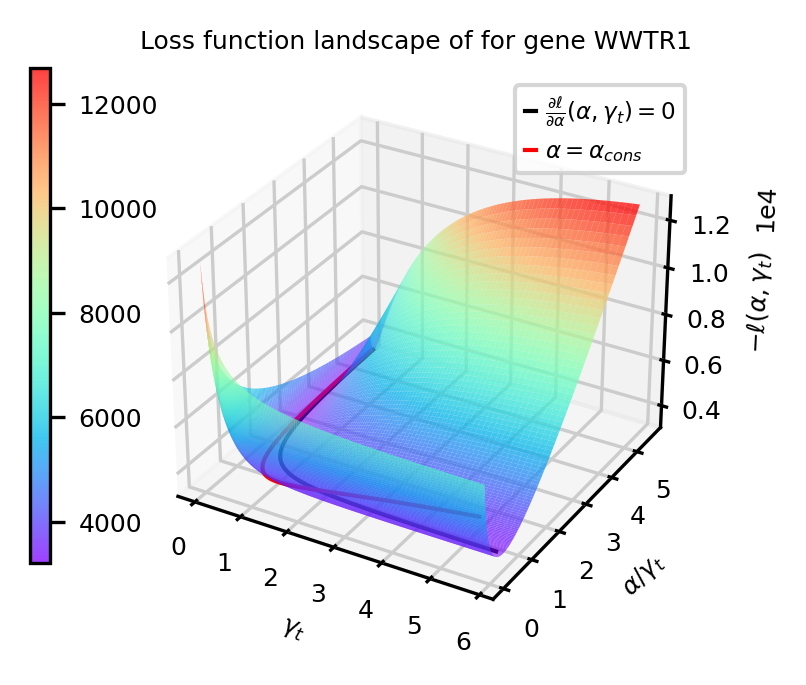

Visualize the landscape of the CSP model loss function: 1it [00:23, 23.26s/it]


In [5]:
gene_name_list = ['WWTR1']
# save_path = './Figures/dataset1/robust_analysis/WWTR1.pdf'
save_path = None

CSP4ML.visualize_CSP_loss_landscape(rpe1_kinetics_without_spliced, gene_name_list, 
                            figsize, dpi, save_path)

## Relationship between goodness of fit and robustness measures

Obtain the goodness of fit $\bar{R}^{2}_{D}$ for the parameter inference and calculate the defined robustness measure:

In [7]:
sub_adata_without_spliced = rpe1_kinetics_without_spliced[:, rpe1_kinetics_without_spliced.var['use_for_pca']]
gene_name_list = sub_adata_without_spliced.var.index.tolist()
goodness_of_fit = sub_adata_without_spliced.var['gamma_r2_raw']
robustness_measure = CSP4ML.robustness_measure_CSP(sub_adata_without_spliced, gene_name_list)
robustness_measure_gene_WWTR1 = robustness_measure[gene_name_list.index('WWTR1')]
goodness_of_fit_gene_WWTR1 = goodness_of_fit[gene_name_list.index('WWTR1')]

Calculate the robustness measure: 1000it [04:20,  3.84it/s]


Scatter plots between goodness of fit and robustness measures are plotted. Here the well-fitted genes (red) are those in the top 400 of goodness-of-fit. The results show that the higher the goodness of fit, the higher the robustness of the parameters, which indicates that the genes selected by goodness of fit for downstream analysis have more robust parameters.

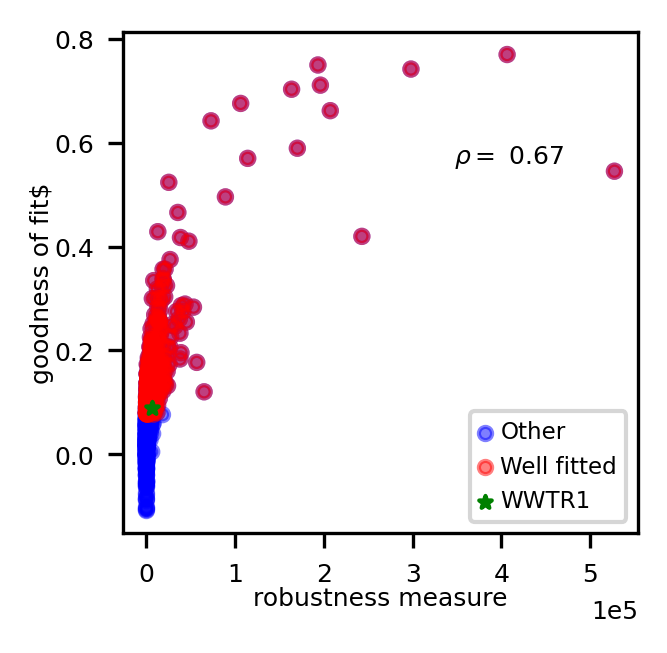

In [8]:
scatter_size = 10
fit_well_number = 400
index_arg = np.argsort(-goodness_of_fit)
index_fit_well = index_arg[range(fit_well_number)]
rho = np.corrcoef(goodness_of_fit, robustness_measure) # correlation coefficient

fig = plt.figure(1, figsize=(2.2, 2.2), dpi=150)
ax = fig.add_subplot(111)
ax.scatter(robustness_measure, goodness_of_fit, color='b', alpha=0.5, label='Other', s=scatter_size * np.ones_like(robustness_measure))
ax.scatter(robustness_measure[index_fit_well], goodness_of_fit[index_fit_well], color='red', alpha=0.5, label='Well fitted',
           s=scatter_size * np.ones_like(index_fit_well))
ax.scatter(robustness_measure_gene_WWTR1, goodness_of_fit_gene_WWTR1, color='g', alpha=1, label='WWTR1', s=scatter_size, marker='*')
ax.set_xlabel('robustness measure',labelpad=-0)
ax.set_ylabel('goodness of fit$',labelpad=-0)
plt.text(0.75, 0.75, '$\\rho=$ %4.2f' % rho[0][1], ha='center',
         va='center', transform=ax.transAxes)
plt.legend()
plt.ticklabel_format(style='sci',scilimits=(0,0),axis='x')
plt.grid(False)
# fig.tight_layout()
# plt.savefig('./Figures/dataset1/robust_analysis/comp_gof_rm.pdf')
plt.show()